In [1]:
import pandas as pd
from pandas_datareader import data, wb

import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

%matplotlib inline

In [2]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 1, 1)
data = data.DataReader(['FXA','USO','EWA'],  'google', start, end)

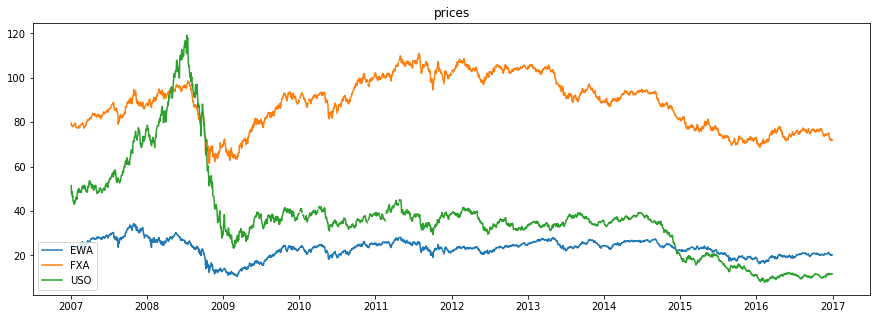

In [3]:
fx_data =data['Open']
plt.figure(figsize=(15,5));
plt.plot(fx_data.index,fx_data);
plt.legend(fx_data.columns.values,loc=3);
plt.title("prices");

In [9]:
fx_data = fx_data.apply(np.int64)

In [10]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = fx_data[['FXA','USO']]
y = fx_data['EWA']

X[['FXA','USO']] = scale.fit_transform(X[['FXA','USO']].as_matrix())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

                FXA      USO
Date                        
2007-01-03  0.08487  0.08487
2007-01-04  0.08487  0.08487
2007-01-05  0.08487  0.08487
2007-01-08  0.08487  0.08487
2007-01-09  0.08487  0.08487
2007-01-10  0.08487  0.08487
2007-01-11  0.08487  0.08487
2007-01-12  0.08487  0.08487
2007-01-16  0.08487  0.08487
2007-01-17  0.08487  0.08487
2007-01-18  0.08487  0.08487
2007-01-19  0.08487  0.08487
2007-01-22  0.08487  0.08487
2007-01-23  0.08487  0.08487
2007-01-24  0.08487  0.08487
2007-01-25  0.08487  0.08487
2007-01-26  0.08487  0.08487
2007-01-29  0.08487  0.08487
2007-01-30  0.08487  0.08487
2007-01-31  0.08487  0.08487
2007-02-01  0.08487  0.08487
2007-02-02  0.08487  0.08487
2007-02-05  0.08487  0.08487
2007-02-06  0.08487  0.08487
2007-02-07  0.08487  0.08487
2007-02-08  0.08487  0.08487
2007-02-09  0.08487  0.08487
2007-02-12  0.08487  0.08487
2007-02-13  0.08487  0.08487
2007-02-14  0.08487  0.08487
...             ...      ...
2016-11-17  0.08487  0.08487
2016-11-18  0.

C:\Users\alexb\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\alexb\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\alexb\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:                    EWA   R-squared:          -74017284371039661100604866953216.000
Model:                            OLS   Adj. R-squared:     -74076145034555402484859801698304.000
Method:                 Least Squares   F-statistic:                                       -1258.
Date:                Fri, 19 May 2017   Prob (F-statistic):                                  1.00
Time:                        21:19:52   Log-Likelihood:                               -1.0380e+05
No. Observations:                2517   AIC:                                            2.076e+05
Df Residuals:                    2515   BIC:                                            2.076e+05
Df Model:                           2                                                            
Covariance Type:            nonrobust                                                            
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FXA         7.351e+28    2.1e+29      0.351      0.726   -3.38e+29    4.85e+29
USO        -7.351e+28    2.1e+29     -0.351      0.726   -4.85e+29    3.38e+29
==============================================================================
Omnibus:                     8018.781   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        662743113.864
Skew:                         -50.137   Prob(JB):                         0.00
Kurtosis:                    2514.833   Cond. No.                     1.07e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.4e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
y.groupby(fx_data.EWA).mean()

EWA
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
Name: EWA, dtype: int64